In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
import seaborn as sb
from pylab import rcParams
import datetime
from collections import Counter
%matplotlib inline
rcParams['figure.figsize']=7,7

In [2]:
weather = pd.read_csv("/home/francisanokye/AIMS/Data_Bank/weather.csv")
weather.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2007-11-01  Canberra      8.0     24.3       0.0          3.4       6.3   
1  2007-11-02  Canberra     14.0     26.9       3.6          4.4       9.7   
2  2007-11-03  Canberra     13.7     23.4       3.6          5.8       3.3   
3  2007-11-04  Canberra     13.3     15.5      39.8          7.2       9.1   
4  2007-11-05  Canberra      7.6     16.1       2.8          5.6      10.6   

  WindGustDir  WindGustSpeed WindDir9am      ...      Humidity3pm  \
0          NW           30.0         SW      ...               29   
1         ENE           39.0          E      ...               36   
2          NW           85.0          N      ...               69   
3          NW           54.0        WNW      ...               56   
4         SSE           50.0        SSE      ...               49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM  RainTomorrow  
0      3.6           Yes  
1      3.6           Yes  
2     39.8           Yes  
3      2.8           Yes  
4      0.0            No  

[5 rows x 24 columns]

In [3]:
weather.shape

(366, 24)

In [4]:
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [5]:
weather.describe()

MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.000000    13.000000   
25%        31.000000      6.000000     11.000000    64.000000    32.250000   
50%        39.000000      7.000000     17.000000    72.000000    43.000000   
75%        46.000000     13.000000     24.000000    81.000000    55.000000   
max        98.000000     41.000000     52.000000    99.000000    96.000000   

       Pressure9am  Pressure3pm    Cloud9am    Cloud3pm     Temp9am  \
count   366.000000   366.000000  366.000000  366.000000  366.000000   
mean   1019.709016  1016.810383    3.890710    4.024590   12.358470   
std       6.686212     6.469422    2.956131    2.666268    5.630832   
min     996.500000   996.800000    0.000000    0.000000    0.100000   
25%    1015.350000  1012.800000    1.000000    1.000000    7.625000   
50%    1020.150000  1017.400000    3.500000    4.000000   12.550000   
75%    1024.475000  1021.475000    7.000000    7.000000   17.000000   
max    1035.700000  1033.200000    8.000000    8.000000   24.700000   

          Temp3pm     RISK_MM  
count  366.000000  366.000000  
mean    19.230874    1.428415  
std      6.640346    4.225800  
min      5.100000    0.000000  
25%     14.150000    0.000000  
50%     18.550000    0.000000  
75%     24.000000    0.200000  
max     34.500000   39.800000

In [6]:
weather.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

### Replacing missing value for Sunshine

In [7]:
weather['Sunshine'].isnull().sum()

3

In [8]:
missingsunshine = weather[weather['Sunshine'].isnull()].index.tolist()
missingsunshine

[221, 300, 348]

In [9]:
weather['Sunshine'].iloc[missingsunshine] = weather['Sunshine'].mean()

/home/francisanokye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Replacing missing value for WindGustDir

In [10]:
Counter(weather['WindGustDir'])

Counter({'NW': 73,
         'ENE': 30,
         'SSE': 12,
         'SE': 12,
         'E': 37,
         'S': 22,
         'N': 21,
         'WNW': 35,
         'ESE': 23,
         'NE': 16,
         'NNE': 8,
         'NNW': 44,
         'SW': 3,
         'W': 20,
         'WSW': 2,
         'SSW': 5,
         nan: 3})

In [11]:
missingwindgustdir = weather[weather['WindGustDir'].isnull()].index.tolist()
missingwindgustdir

[193, 211, 271]

In [12]:
weather['WindGustDir'].iloc[missingwindgustdir] = 'NW'

/home/francisanokye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


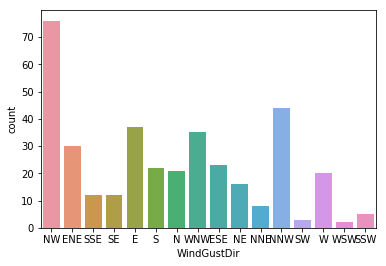

In [13]:
sb.countplot(weather['WindGustDir'])

### Replacing missing value for WindGustSpeed

In [14]:
missinggwindGustSpeed = weather[weather['WindGustSpeed'].isnull()].index.tolist()
missinggwindGustSpeed 

[211, 271]

In [15]:
weather['WindGustSpeed'].iloc[missinggwindGustSpeed] = weather['WindGustSpeed'].mean()

/home/francisanokye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Replacing missing value for WindDir9am

In [16]:
Counter(weather['WindDir9am'])

Counter({'SW': 7,
         'E': 22,
         'N': 31,
         'WNW': 16,
         'SSE': 40,
         'SE': 47,
         'S': 27,
         'WSW': 5,
         'NNE': 8,
         'NNW': 36,
         'ENE': 8,
         'SSW': 17,
         'NW': 30,
         'ESE': 29,
         'NE': 4,
         'W': 8,
         nan: 31})

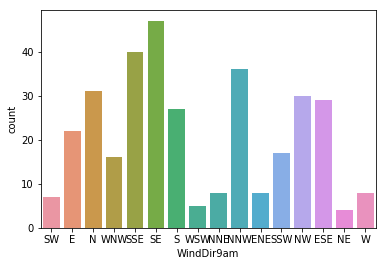

In [17]:
sb.countplot(weather['WindDir9am'])

In [18]:
weather['WindDir9am'].mode()

0    SE
dtype: object

In [19]:
pd.crosstab(weather['WindDir9am'].isnull(),weather['WindSpeed9am'].isnull()).transpose()

WindDir9am    False  True 
WindSpeed9am              
False           335     24
True              0      7

In [20]:
missingWindDir9am = weather[weather['WindDir9am'].isnull()].index.tolist()
#missingWindDir9am

In [21]:
weather['WindDir9am'].iloc[missingWindDir9am] = 'SE'

/home/francisanokye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


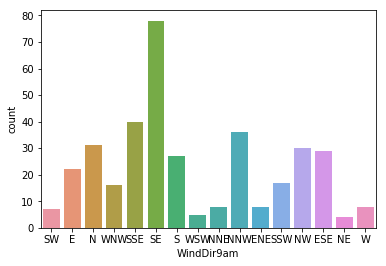

In [22]:
sb.countplot(weather['WindDir9am'])

### Replacing missing value for WindDir3pm 

In [23]:
Counter(weather['WindDir3pm'])

Counter({'NW': 61,
         'W': 26,
         'NNE': 14,
         'ESE': 27,
         'E': 17,
         'ENE': 13,
         'WSW': 11,
         'NE': 15,
         'NNW': 47,
         'SE': 12,
         'S': 14,
         'SW': 4,
         'WNW': 61,
         'N': 30,
         'SSW': 6,
         'SSE': 7,
         nan: 1})

In [24]:
missingWindDir3pm = weather[weather['WindDir3pm'].isnull()].index.tolist()
missingWindDir3pm

[222]

In [25]:
weather['WindDir3pm'].iloc[missingWindDir3pm] = 'NW'

/home/francisanokye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Replacing missing value for WindSpeed9am 

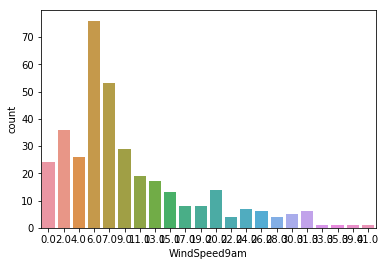

In [26]:
sb.countplot(weather['WindSpeed9am'])

In [27]:
missingwindspeed9am = weather[weather['WindSpeed9am'].isnull()].index.tolist()
missingwindspeed9am

[113, 118, 127, 195, 213, 247, 257]

In [28]:
weather['WindSpeed9am'].iloc[missingwindspeed9am] = 6.0

/home/francisanokye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
weather['WindSpeed9am'].isnull().sum()

0

### ALL MISSING VALUES HAVE BEEN RELACED,THUS DATA IS CLEANED OFF MISSING VALUE

In [30]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

/home/francisanokye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


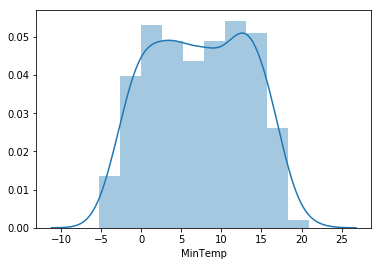

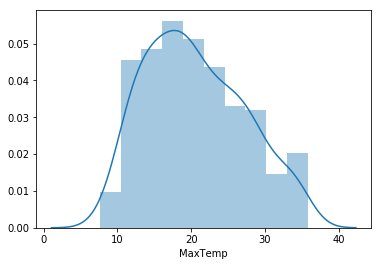

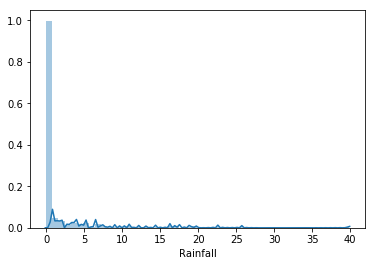

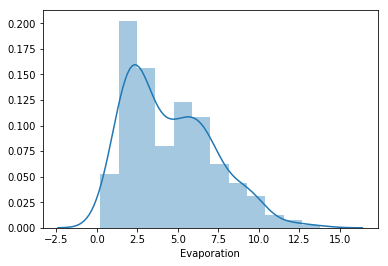

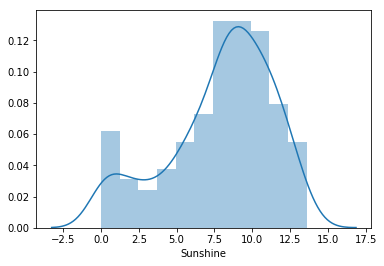

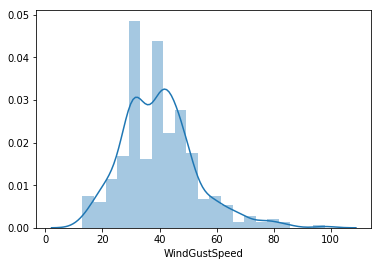

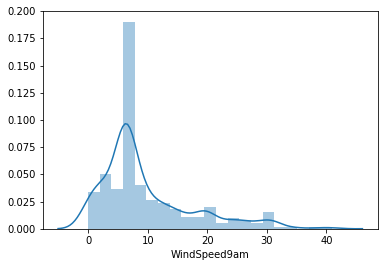

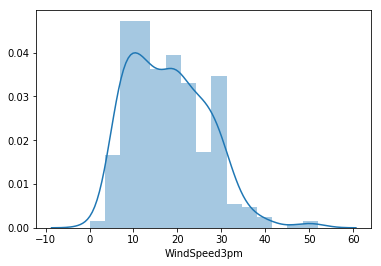

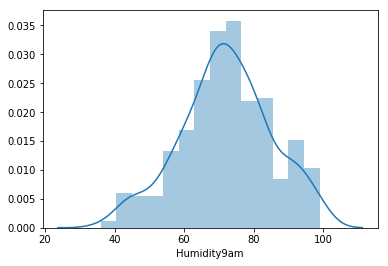

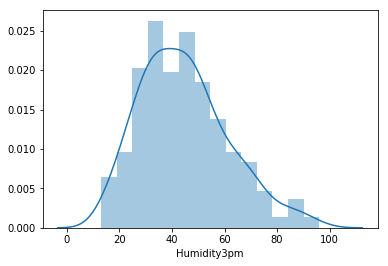

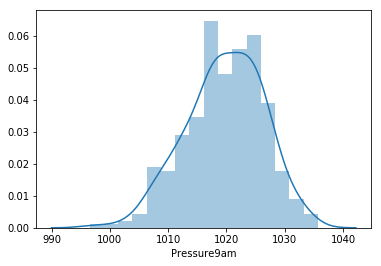

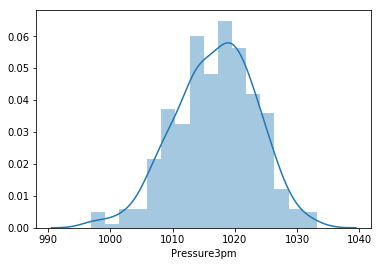

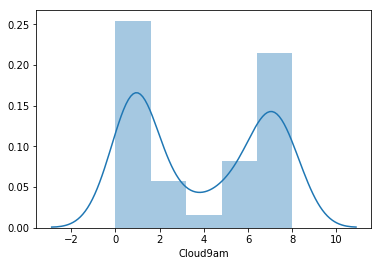

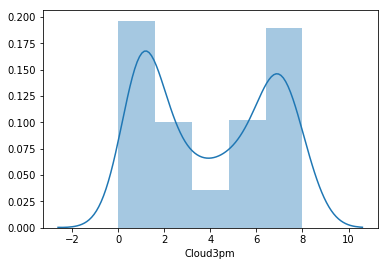

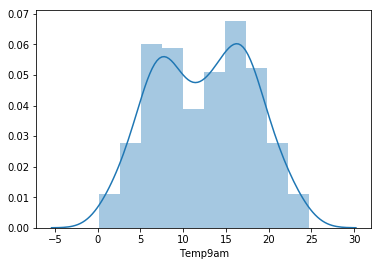

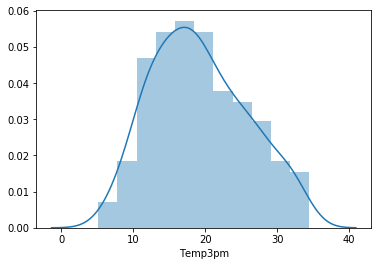

In [31]:
col=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for i in col:
    sb.distplot(weather[i])
    plt.show()

/home/francisanokye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


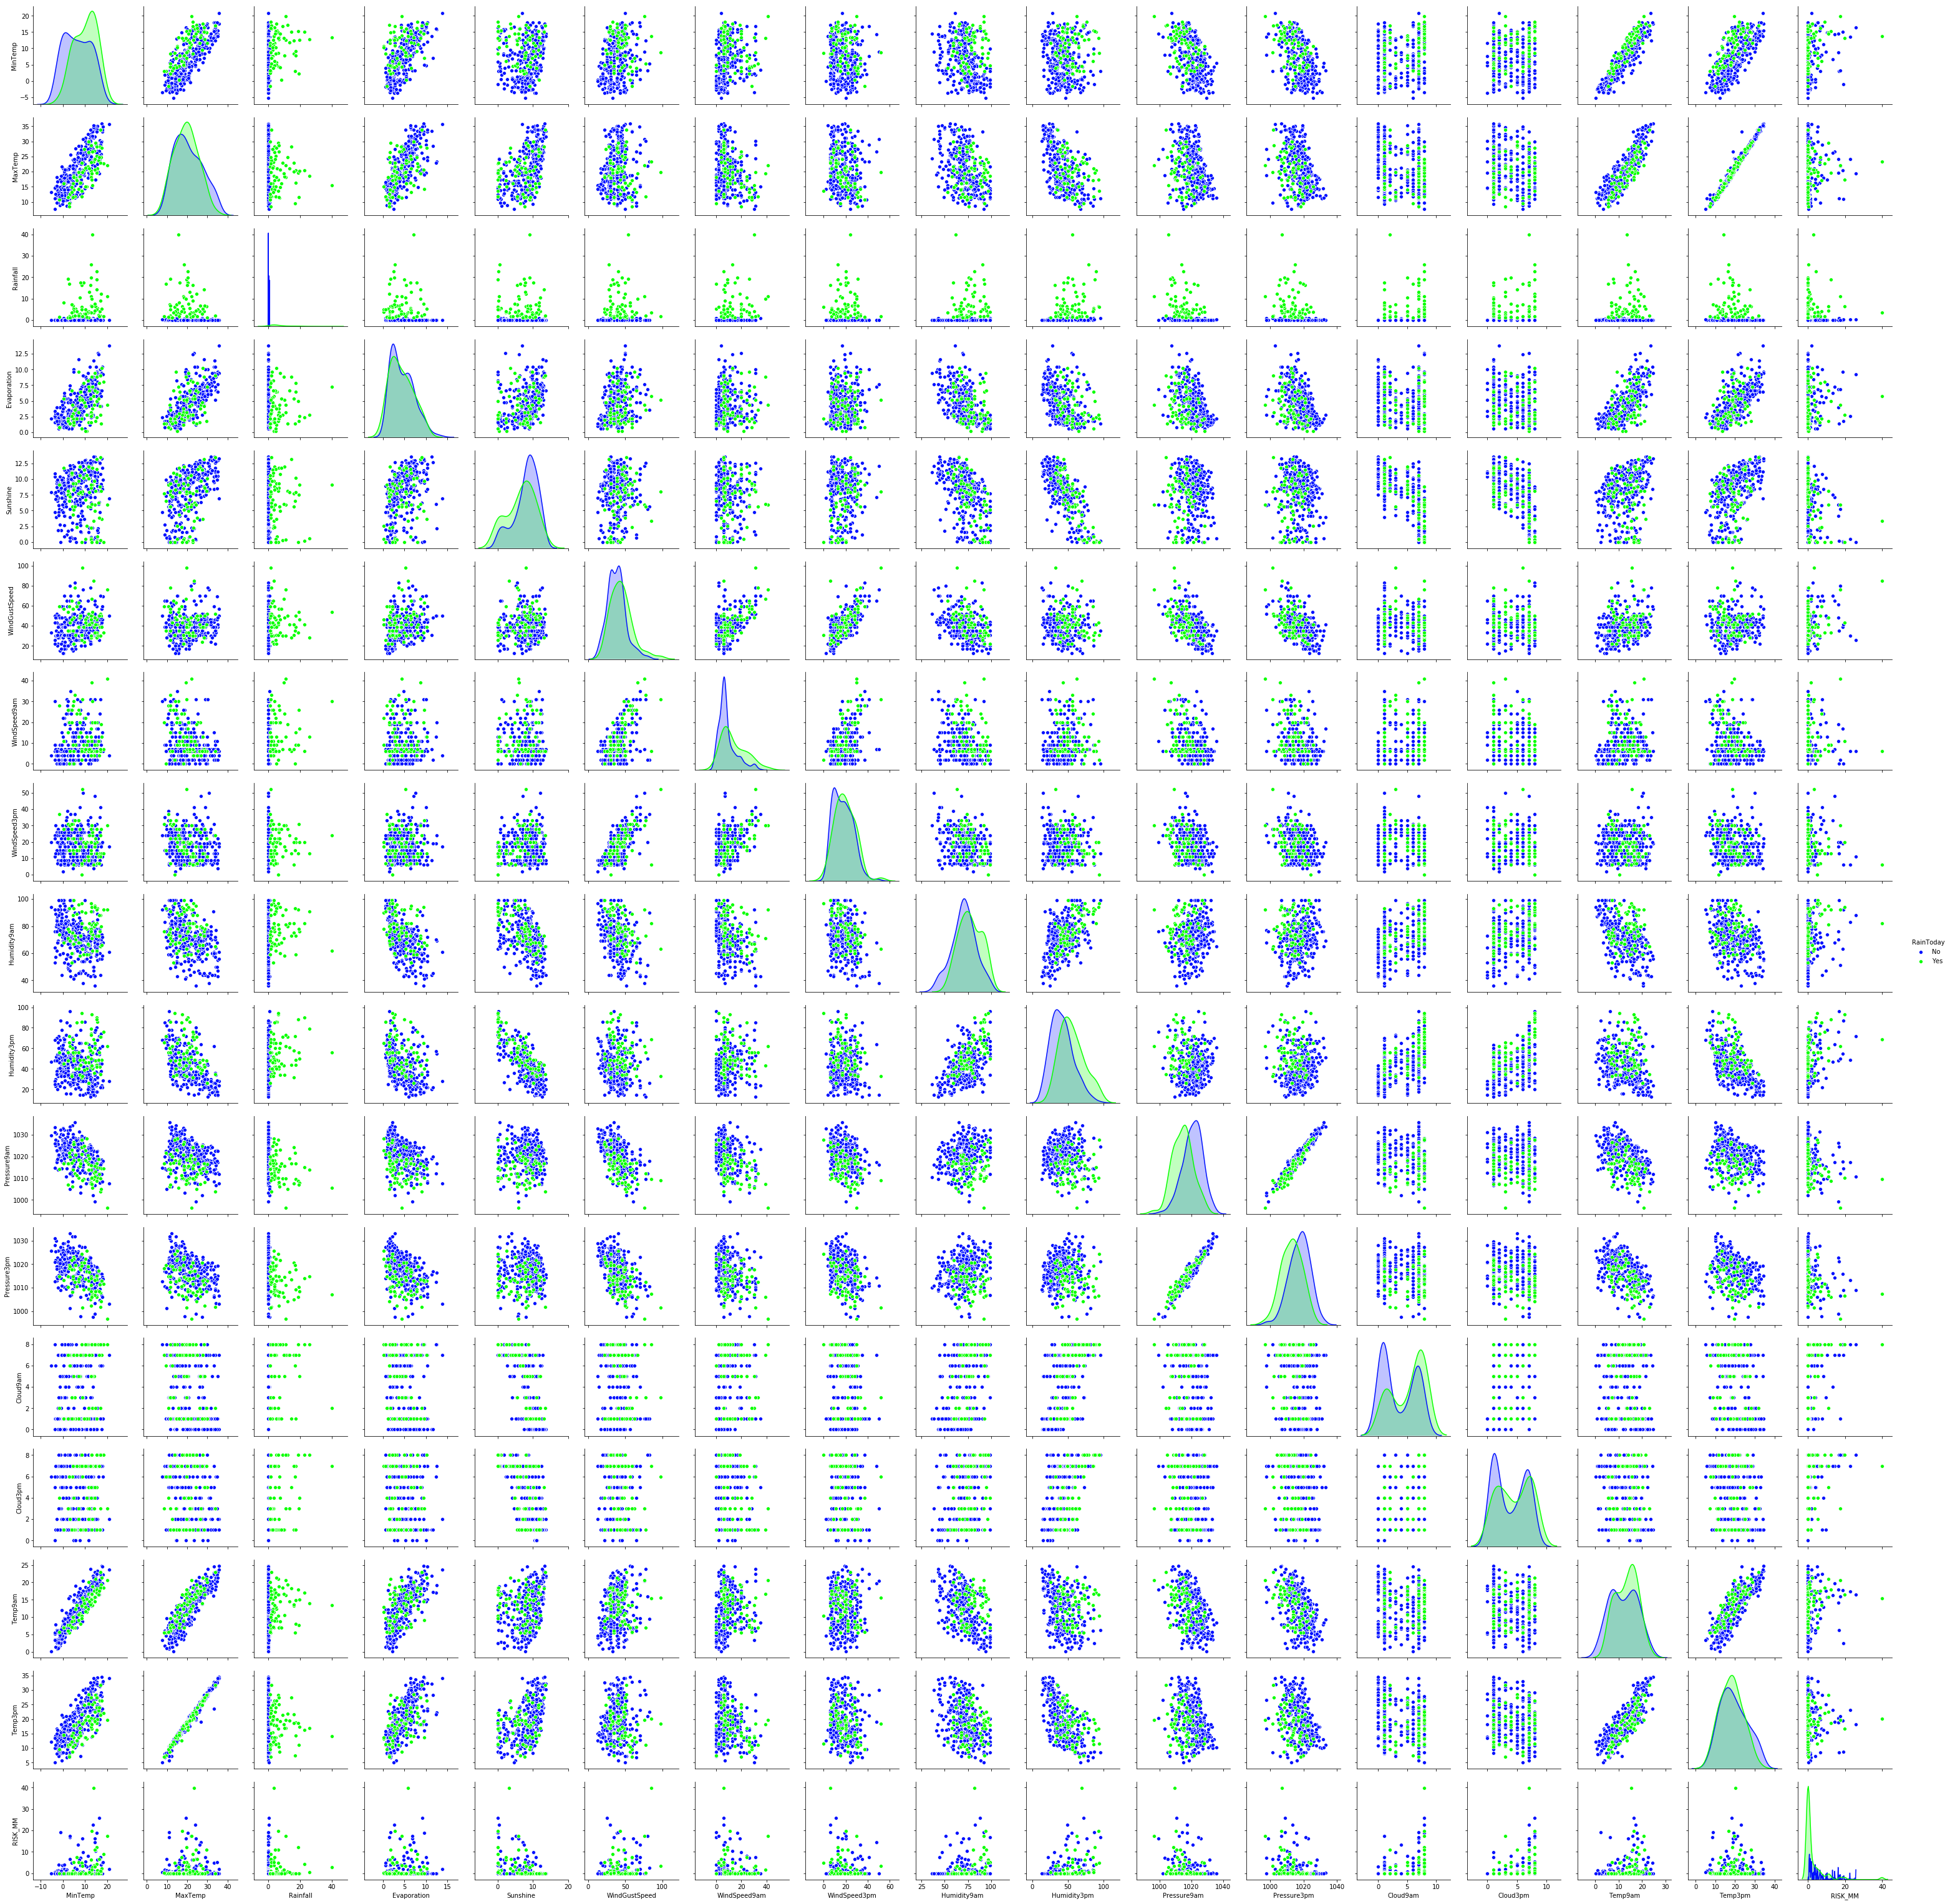

In [32]:
sb.pairplot(weather,hue="RainToday", palette="hsv_r")

In [33]:
Counter(weather['RainToday'])

Counter({'No': 300, 'Yes': 66})

In [34]:
Counter(weather['RainTomorrow'])

Counter({'Yes': 66, 'No': 300})

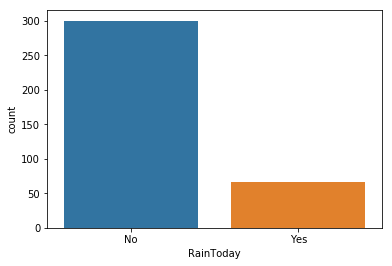

In [35]:
sb.countplot(weather['RainToday'])

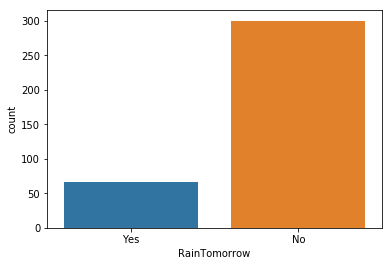

In [36]:
sb.countplot(weather['RainTomorrow'])

MinTemp


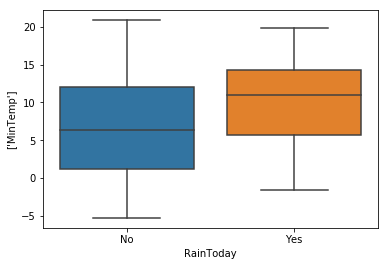

MaxTemp


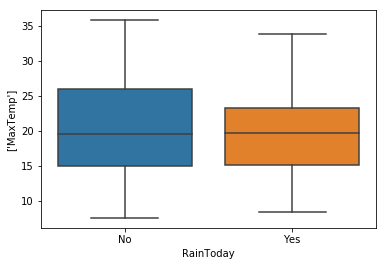

Rainfall


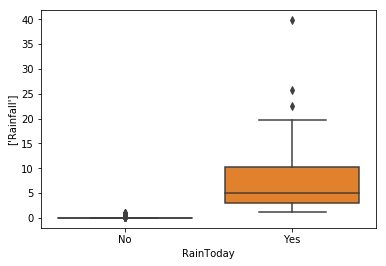

Evaporation


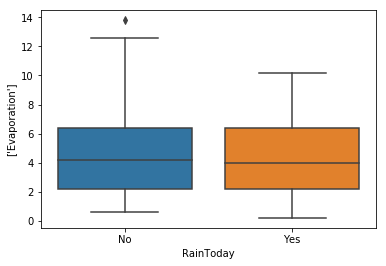

Sunshine


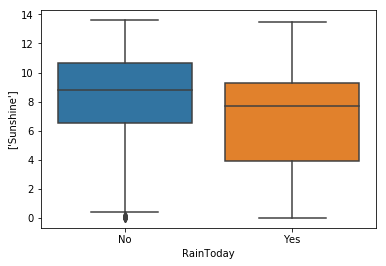

WindGustSpeed


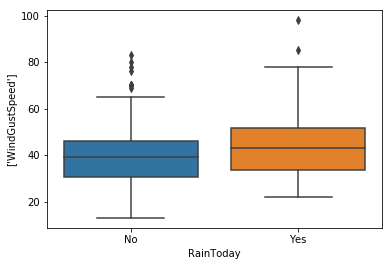

WindSpeed9am


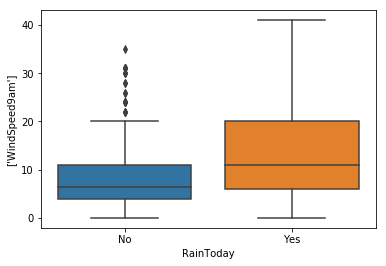

WindSpeed3pm


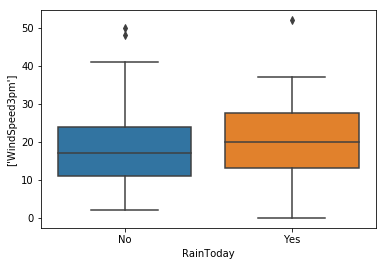

Humidity9am


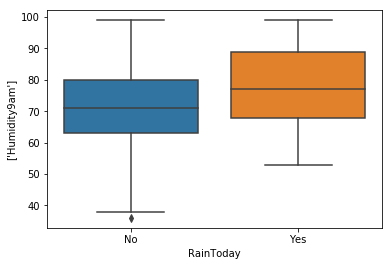

Humidity3pm


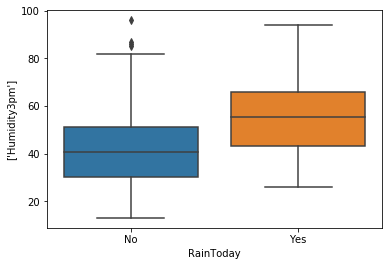

Pressure9am


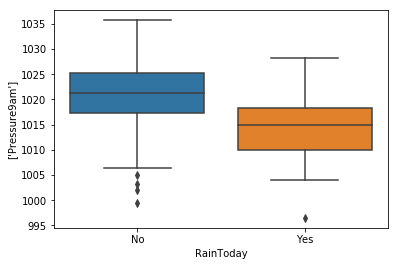

Pressure3pm


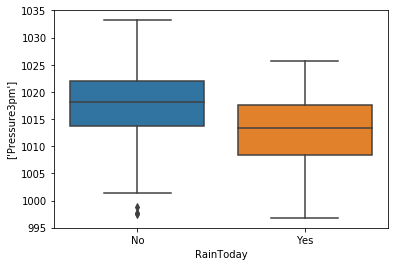

Cloud9am


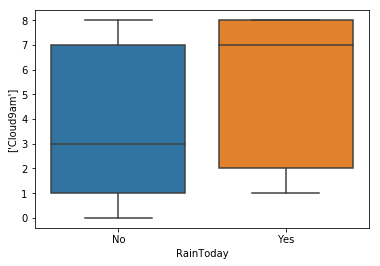

Cloud3pm


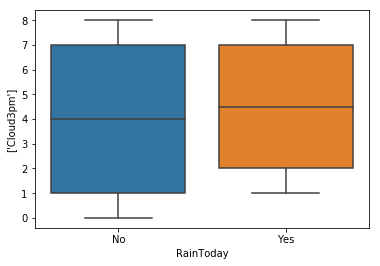

Temp9am


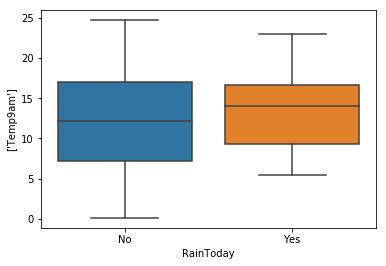

Temp3pm


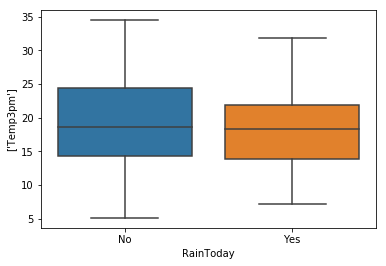

RISK_MM


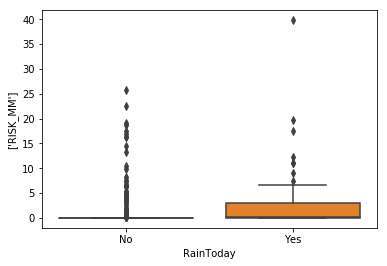

In [37]:
def catgplot(weather,Categ,xcol='RainToday'):
    for i in Categ:
        print(i)
        sb.boxplot(xcol,i,data=weather)
        plt.xlabel(xcol)
        plt.ylabel([i])
        plt.show()
        
Categ = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RISK_MM']
catgplot(weather,Categ,xcol='RainToday')        

MinTemp


/home/francisanokye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


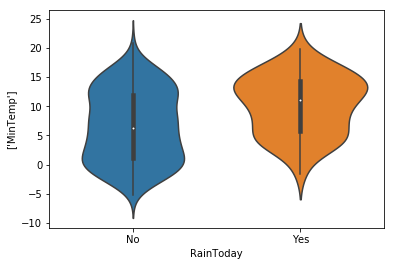

MaxTemp


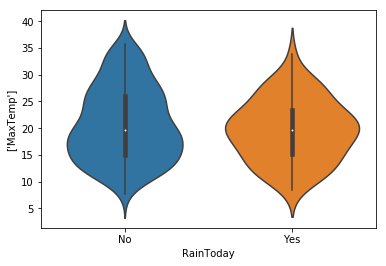

Rainfall


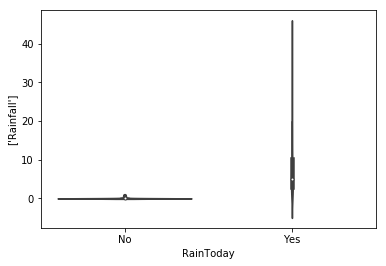

Evaporation


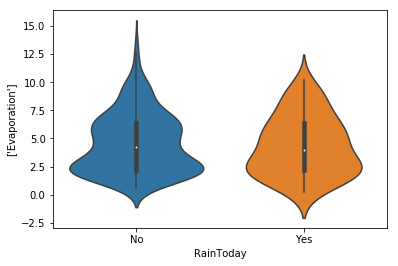

Sunshine


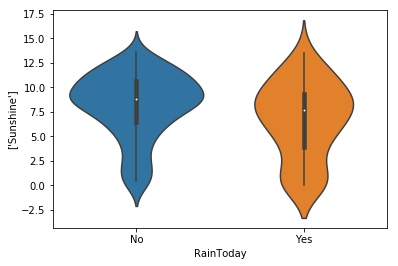

WindGustSpeed


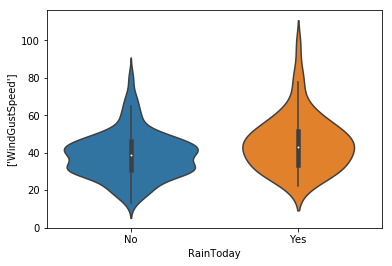

WindSpeed9am


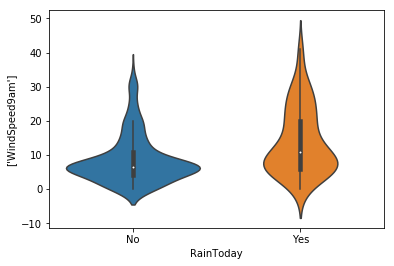

WindSpeed3pm


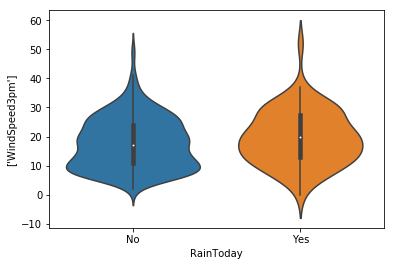

Humidity9am


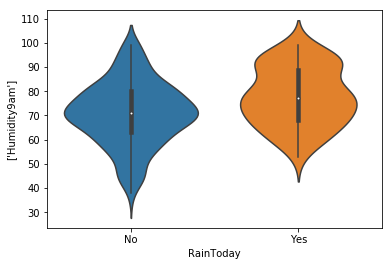

Humidity3pm


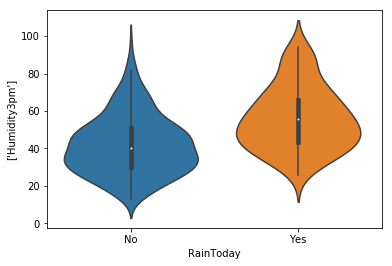

Pressure9am


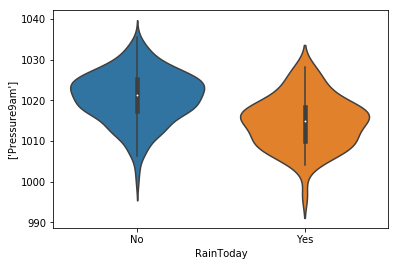

Pressure3pm


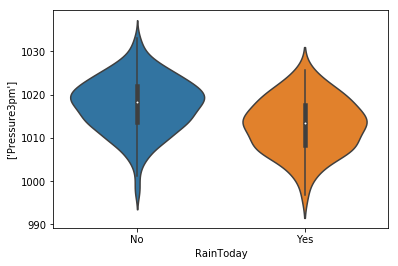

Cloud9am


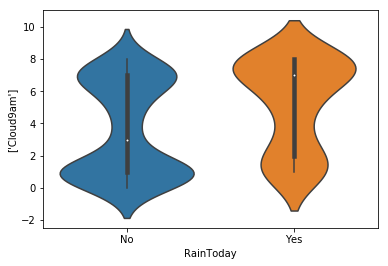

Cloud3pm


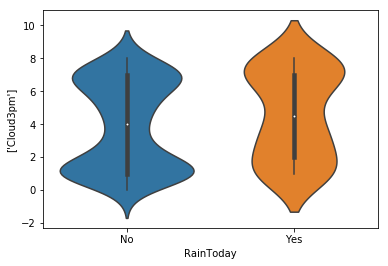

Temp9am


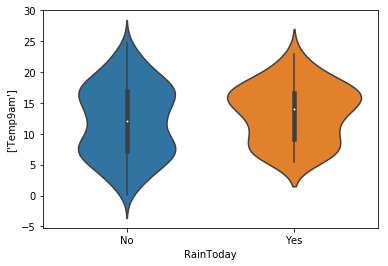

Temp3pm


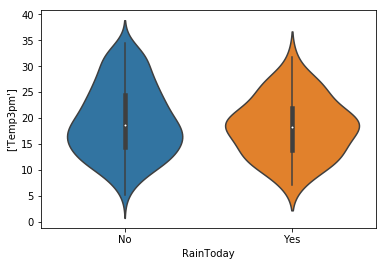

RISK_MM


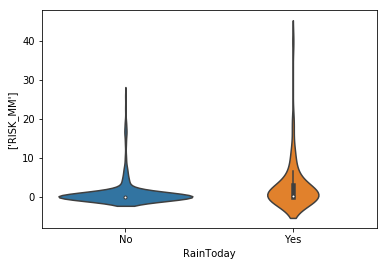

In [38]:
def cvioplot(weather,Categ,xcol='RainTomorrow'):
    for i in Categ:
        print(i)
        sb.violinplot(xcol,i,data=weather)
        plt.xlabel(xcol)
        plt.ylabel([i])
        plt.show()
        
Categ = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RISK_MM']
cvioplot(weather,Categ,xcol='RainToday')   

MinTemp


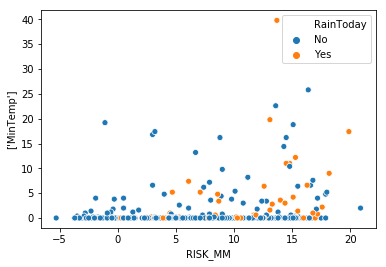

MaxTemp


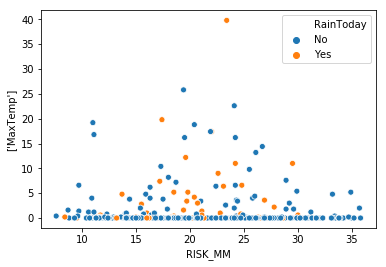

Rainfall


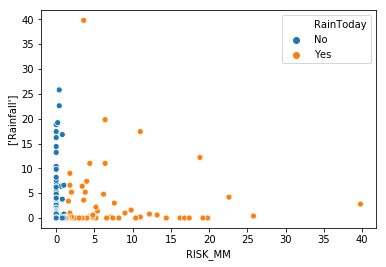

Evaporation


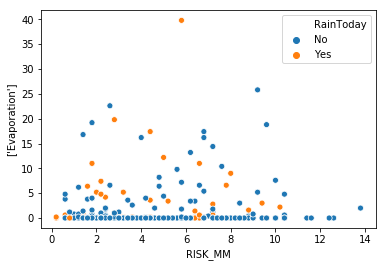

Sunshine


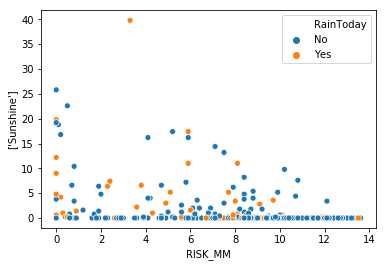

WindGustSpeed


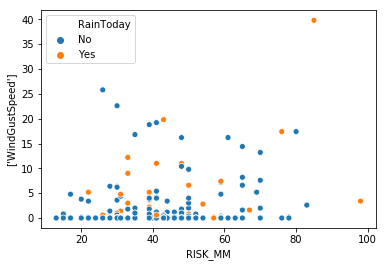

WindSpeed9am


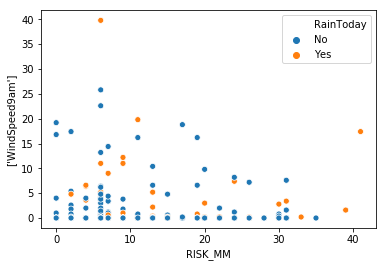

WindSpeed3pm


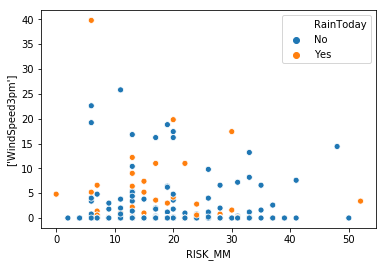

Humidity9am


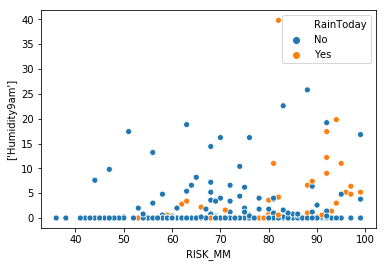

Humidity3pm


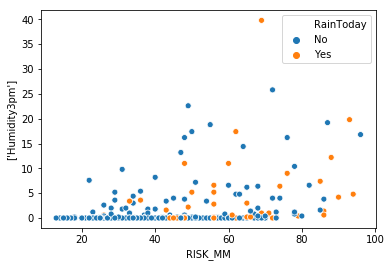

Pressure9am


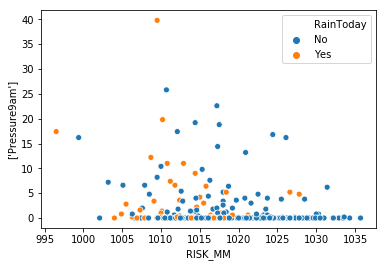

Pressure3pm


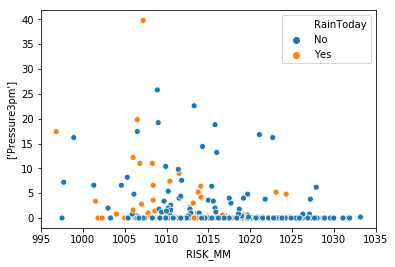

Cloud9am


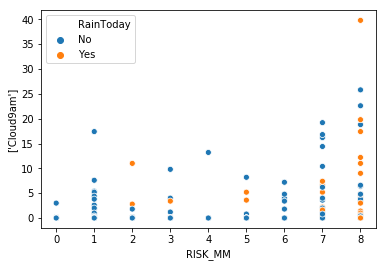

Cloud3pm


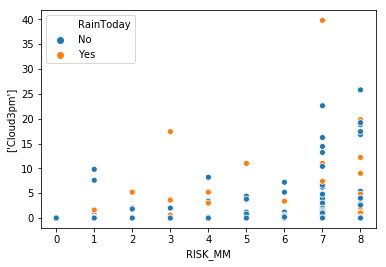

Temp9am


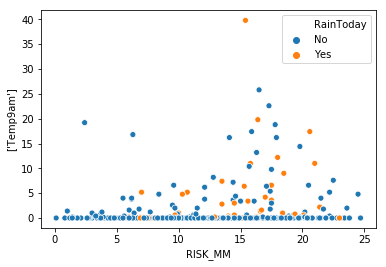

Temp3pm


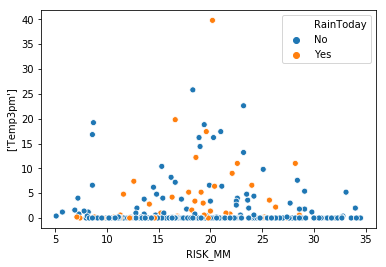

In [39]:
def swa(weather,col,hue,xcol='RISK_MM'):
    for i in col:
        print(i)
        sb.scatterplot(i,xcol,hue,data=weather)
        plt.xlabel(xcol)
        plt.ylabel([i])
        plt.legend()
        plt.show()
col=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
palette = ['red','green','orange','blue']
swa(weather,col,hue='RainToday',xcol='RISK_MM')        

MinTemp


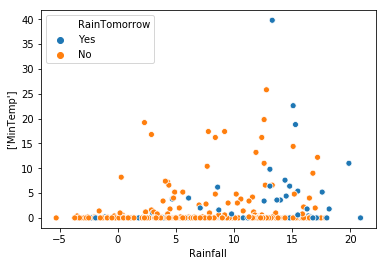

MaxTemp


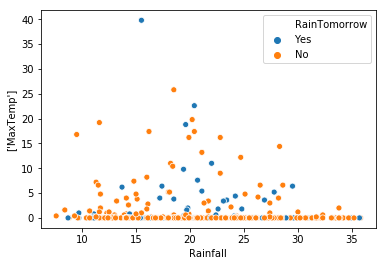

Evaporation


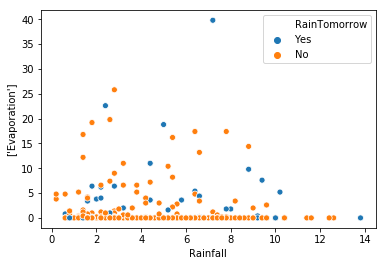

Sunshine


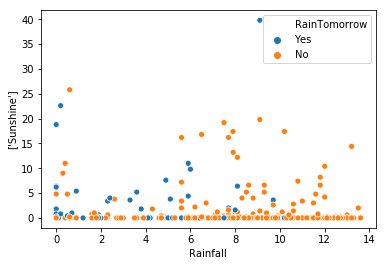

WindGustSpeed


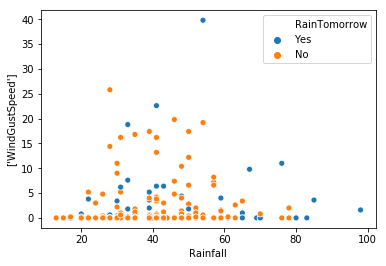

WindSpeed9am


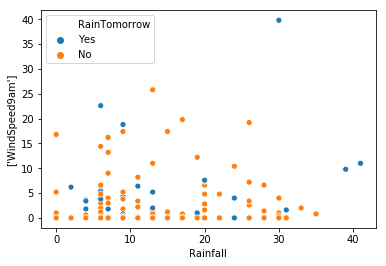

WindSpeed3pm


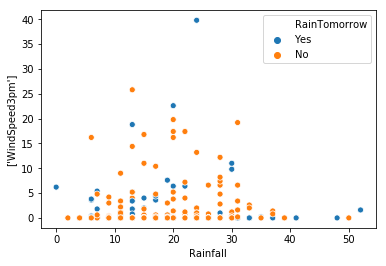

Humidity9am


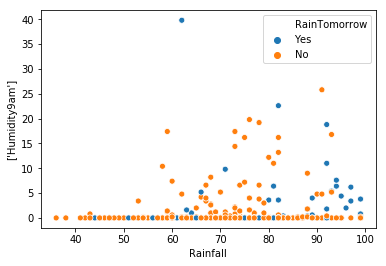

Humidity3pm


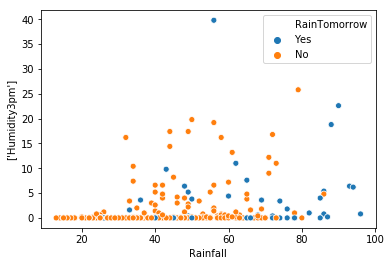

Pressure9am


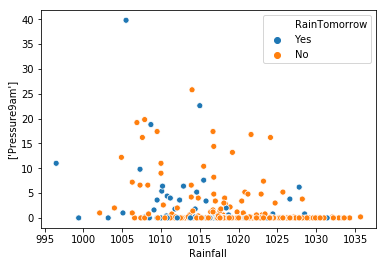

Pressure3pm


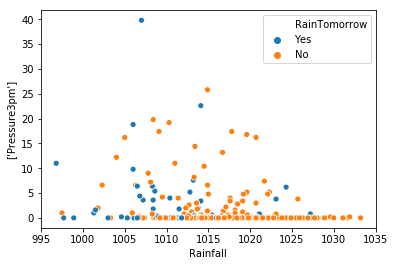

Cloud9am


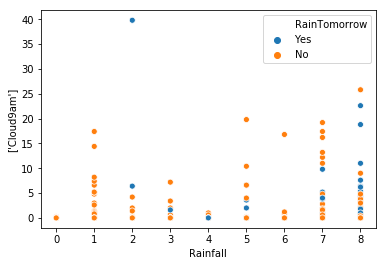

Cloud3pm


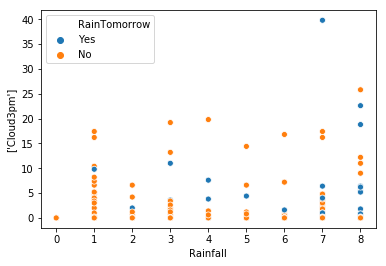

Temp9am


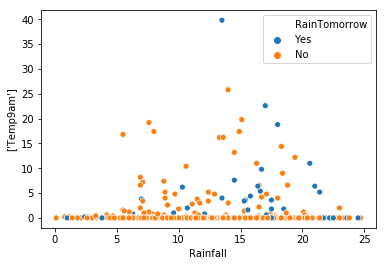

Temp3pm


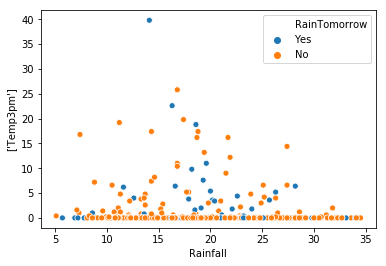

In [95]:
def swa(weather,col,hue,xcol='RISK_MM'):
    for i in col:
        print(i)
        sb.scatterplot(i,xcol,hue,data=weather)
        plt.xlabel(xcol)
        plt.ylabel([i])
        plt.legend()
        plt.show()
col=['MinTemp', 'MaxTemp', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
palette = ['red','green','orange','blue']
swa(weather,col,hue='RainTomorrow',xcol='Rainfall') 

MinTemp


/home/francisanokye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


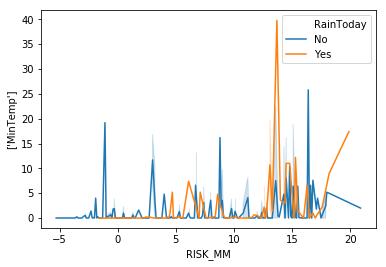

MaxTemp


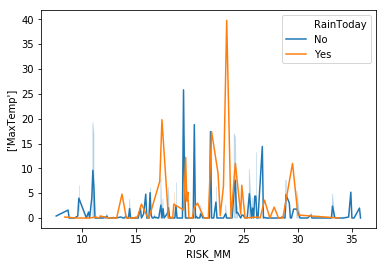

Rainfall


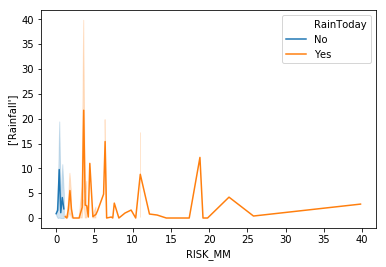

Evaporation


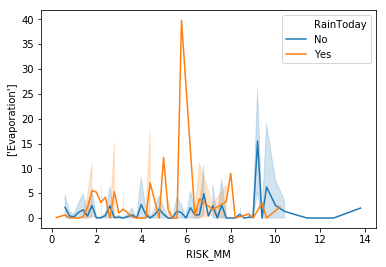

Sunshine


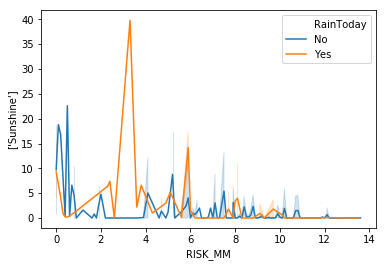

WindGustSpeed


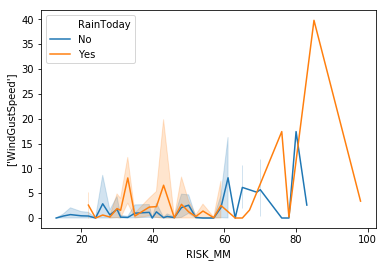

WindSpeed9am


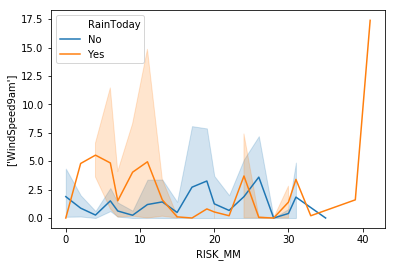

WindSpeed3pm


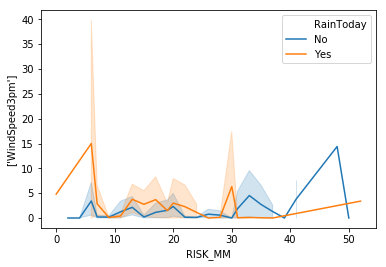

Humidity9am


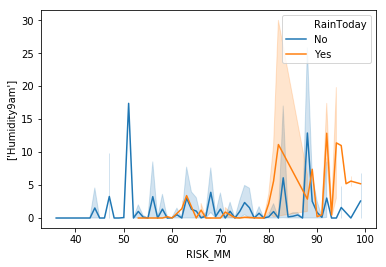

Humidity3pm


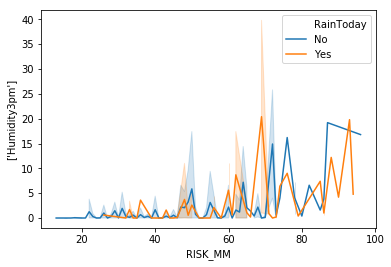

Pressure9am


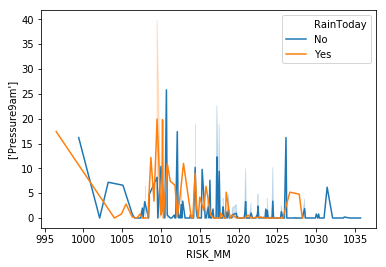

Pressure3pm


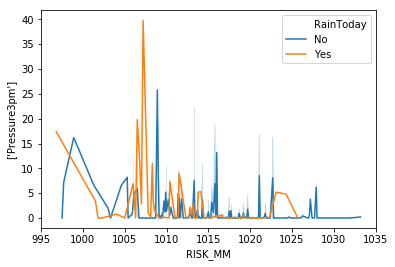

Cloud9am


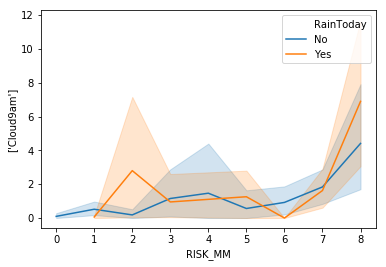

Cloud3pm


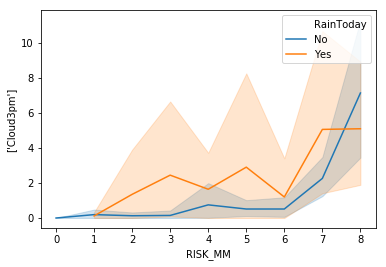

Temp9am


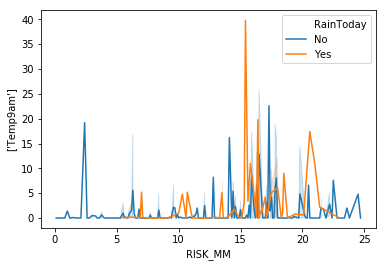

Temp3pm


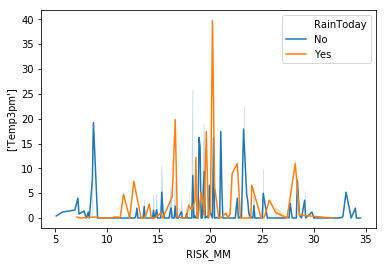

In [41]:
def swa(weather,col,hue,xcol='RISK_MM'):
    for i in col:
        print(i)
        sb.lineplot(i,xcol,hue,data=weather)
        plt.xlabel(xcol)
        plt.ylabel([i])
        plt.legend()
        plt.show()
col=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
palette = ['red','green','orange','blue']
swa(weather,col,hue='RainToday',xcol='RISK_MM')        

MinTemp


/home/francisanokye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


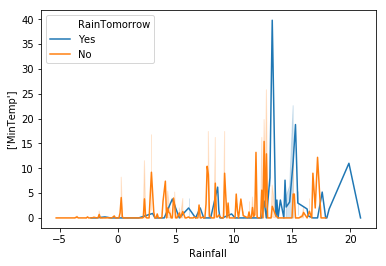

MaxTemp


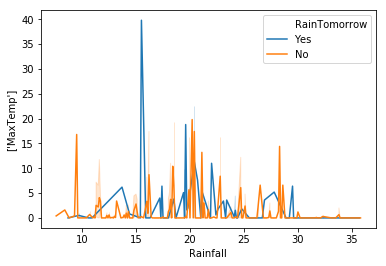

Evaporation


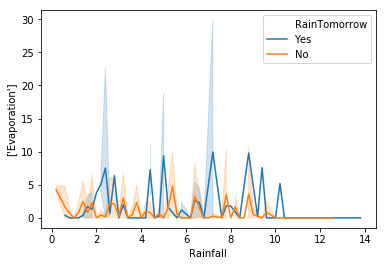

Sunshine


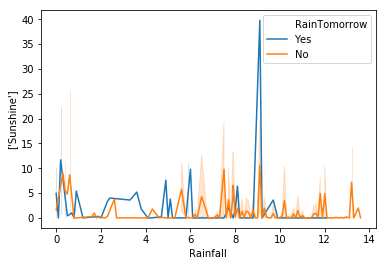

WindGustSpeed


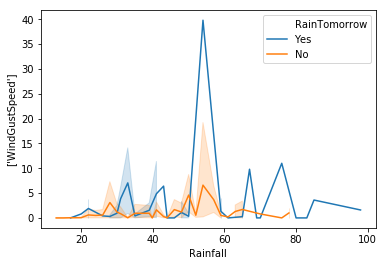

WindSpeed9am


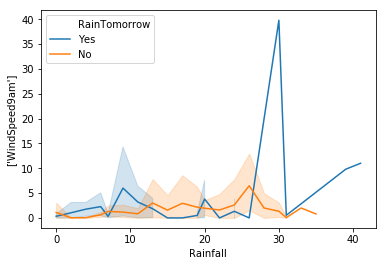

WindSpeed3pm


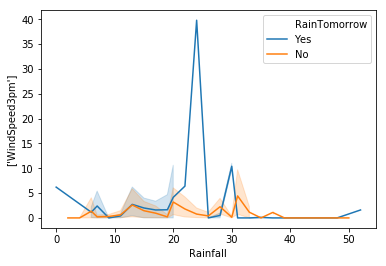

Humidity9am


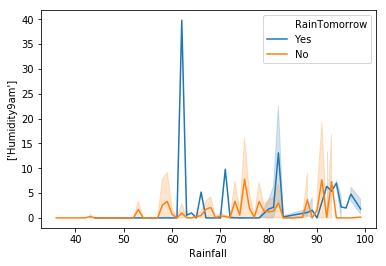

Humidity3pm


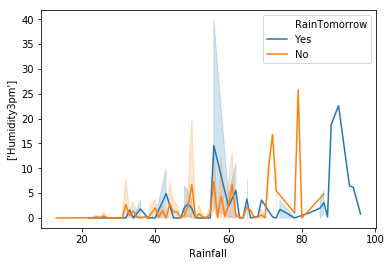

Pressure9am


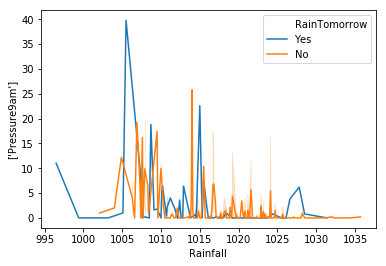

Pressure3pm


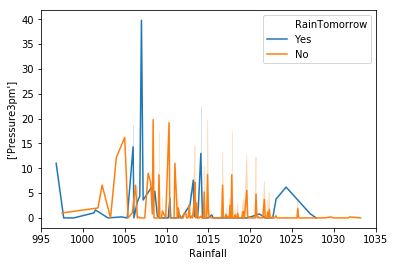

Cloud9am


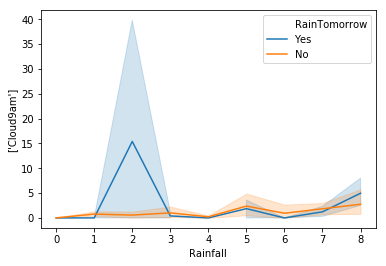

Cloud3pm


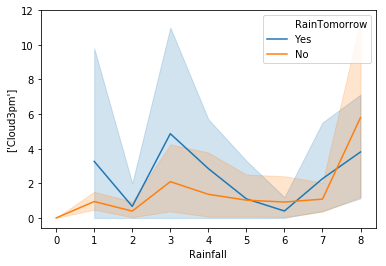

Temp9am


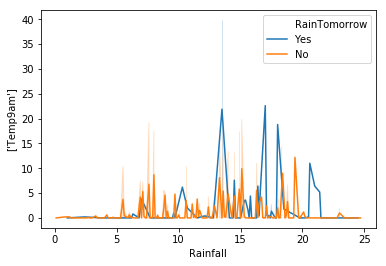

Temp3pm


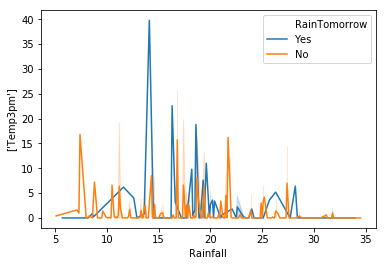

In [42]:
def swa(weather,col,hue,xcol='Date'):
    for i in col:
        print(i)
        sb.lineplot(i,xcol,hue,data=weather)
        plt.xlabel(xcol)
        plt.ylabel([i])
        plt.legend()
        plt.show()
col=['MinTemp', 'MaxTemp', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
palette = ['red','green','orange','blue']
swa(weather,col,hue='RainTomorrow',xcol='Rainfall') 

In [43]:
weather.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.752471  0.201939     0.649930  0.035531   
MaxTemp        0.752471  1.000000 -0.073560     0.690026  0.451395   
Rainfall       0.201939 -0.073560  1.000000    -0.007293 -0.149326   
Evaporation    0.649930  0.690026 -0.007293     1.000000  0.316942   
Sunshine       0.035531  0.451395 -0.149326     0.316942  1.000000   
WindGustSpeed  0.217224  0.109415  0.096160     0.287709  0.095676   
WindSpeed9am   0.129081 -0.214586  0.219557     0.070344 -0.061487   
WindSpeed3pm  -0.065922 -0.167873  0.056008     0.048601  0.072494   
Humidity9am   -0.207897 -0.359602  0.150109    -0.519587 -0.497692   
Humidity3pm   -0.040709 -0.533327  0.289013    -0.391780 -0.755186   
Pressure9am   -0.501707 -0.290883 -0.331581    -0.381906  0.006238   
Pressure3pm   -0.498007 -0.379394 -0.250218    -0.391093 -0.035964   
Cloud9am       0.215776 -0.175730  0.180046    -0.106007 -0.678125   
Cloud3pm       0.118397 -0.135991  0.127792    -0.100045 -0.658699   
Temp9am        0.916745  0.870604  0.077299     0.707676  0.219276   
Temp3pm        0.722730  0.989261 -0.087493     0.671632  0.469774   
RISK_MM        0.218551  0.027557  0.089860     0.076762 -0.378081   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.217224      0.129081     -0.065922    -0.207897   
MaxTemp             0.109415     -0.214586     -0.167873    -0.359602   
Rainfall            0.096160      0.219557      0.056008     0.150109   
Evaporation         0.287709      0.070344      0.048601    -0.519587   
Sunshine            0.095676     -0.061487      0.072494    -0.497692   
WindGustSpeed       1.000000      0.521540      0.693641    -0.349433   
WindSpeed9am        0.521540      1.000000      0.467995    -0.272012   
WindSpeed3pm        0.693641      0.467995      1.000000    -0.266092   
Humidity9am        -0.349433     -0.272012     -0.266092     1.000000   
Humidity3pm        -0.069432      0.145469     -0.026368     0.546718   
Pressure9am        -0.537126     -0.353148     -0.359800     0.135727   
Pressure3pm        -0.524435     -0.244636     -0.337325     0.134420   
Cloud9am           -0.012648      0.105147     -0.026426     0.392842   
Cloud3pm            0.050051     -0.026464      0.007207     0.271938   
Temp9am             0.255331      0.066150     -0.017766    -0.436551   
Temp3pm             0.072348     -0.233407     -0.187570    -0.355119   
RISK_MM             0.251912      0.041009     -0.009447     0.165931   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp          -0.040709    -0.501707    -0.498007  0.215776  0.118397   
MaxTemp          -0.533327    -0.290883    -0.379394 -0.175730 -0.135991   
Rainfall          0.289013    -0.331581    -0.250218  0.180046  0.127792   
Evaporation      -0.391780    -0.381906    -0.391093 -0.106007 -0.100045   
Sunshine         -0.755186     0.006238    -0.035964 -0.678125 -0.658699   
WindGustSpeed    -0.069432    -0.537126    -0.524435 -0.012648  0.050051   
WindSpeed9am      0.145469    -0.353148    -0.244636  0.105147 -0.026464   
WindSpeed3pm     -0.026368    -0.359800    -0.337325 -0.026426  0.007207   
Humidity9am       0.546718     0.135727     0.134420  0.392842  0.271938   
Humidity3pm       1.000000    -0.087946    -0.010052  0.551633  0.510108   
Pressure9am      -0.087946     1.000000     0.967895 -0.157553 -0.141000   
Pressure3pm      -0.010052     0.967895     1.000000 -0.128944 -0.143837   
Cloud9am          0.551633    -0.157553    -0.128944  1.000000  0.525218   
Cloud3pm          0.510108    -0.141000    -0.143837  0.525218  1.000000   
Temp9am          -0.255681    -0.460418    -0.492636  0.021041  0.040945   
Temp3pm          -0.581676    -0.253674    -0.345485 -0.202344 -0.172814   
RISK_MM           0.358752    -0.290584    -0.311421  0.273914  0.326455   

                Temp9am   Temp3pm   RISK_MM  
MinTemp        0.916745  

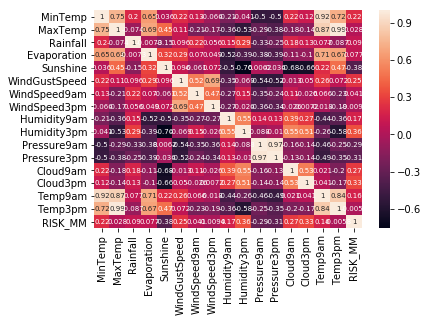

In [44]:
cor =weather.corr()
sb.heatmap(cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values,annot=True,annot_kws={'size':7})

## MODELS FOR WEATHER PREDICTION

In [85]:
from sklearn.preprocessing import scale,robust_scale,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,roc_curve

In [46]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [47]:
X = weather.drop(['Date', 'Location','RainToday', 'RainTomorrow'],axis=1)
print(X.shape)

(366, 20)


In [48]:
X = pd.get_dummies(X)
X = scale(X)

/home/francisanokye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


In [94]:
y1 = weather['RainToday']
y2 = weather['RainTomorrow']
y1 = LabelEncoder().fit_transform(y1)
y2 = LabelEncoder().fit_transform(y2)


### Modeling for RainToday with y1

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y1,test_size =.3,random_state=123,shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(256, 65)
(256,)
(110, 65)
(110,)


#### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log = LogisticRegression()
log = log.fit(X_train,y_train)
logpred = log.predict(X_test)
print('The accuracy for the logistic regression is {0}'.format(accuracy_score(logpred,y_test)* 100))

The accuracy for the logistic regression is 89.0909090909091


/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
print(classification_report(logpred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        91
           1       0.67      0.74      0.70        19

   micro avg       0.89      0.89      0.89       110
   macro avg       0.81      0.83      0.82       110
weighted avg       0.90      0.89      0.89       110



In [86]:
roc_auc_score(logpred,y_test)

0.8299595141700407

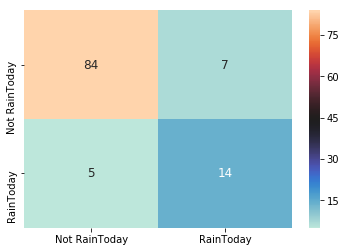

In [54]:
lconf = confusion_matrix(logpred,y_test)
conf = pd.DataFrame(lconf,('Not RainToday','RainToday'),('Not RainToday','RainToday'))
sb.heatmap(conf,xticklabels=conf.columns.values,yticklabels=conf.columns.values,annot=True,annot_kws={'size':12},cmap='icefire')

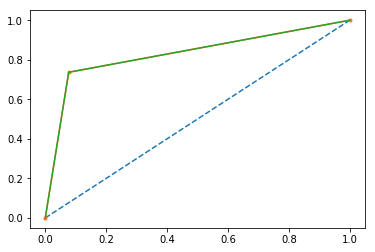

In [90]:
fpr,tpr ,thresholds = roc_curve(logpred,y_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.plot(fpr,tpr)
plt.show()

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [56]:
ran = RandomForestClassifier()
ran = ran.fit(X_train,y_train)
ranpred = ran.predict(X_test)

/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
print("The accuraacy for the random forest model is {0}".format(accuracy_score(ranpred,y_test)*100) )

The accuraacy for the random forest model is 95.45454545454545


In [58]:
print(classification_report(ranpred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        94
           1       0.76      1.00      0.86        16

   micro avg       0.95      0.95      0.95       110
   macro avg       0.88      0.97      0.92       110
weighted avg       0.97      0.95      0.96       110



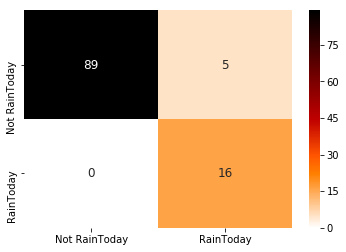

In [59]:
rconf = confusion_matrix(ranpred,y_test)
rrconf = pd.DataFrame(rconf,('Not RainToday','RainToday'),('Not RainToday','RainToday'))
sb.heatmap(rrconf,xticklabels=rrconf.columns.values,yticklabels=rrconf.columns.values,annot=True,annot_kws={'size':12},cmap='gist_heat_r')

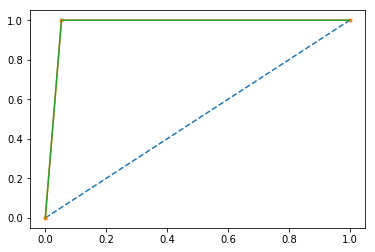

In [92]:
fpr,tpr ,thresholds = roc_curve(ranpred,y_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.plot(fpr,tpr)
plt.show()

#### GradientBoosting Classifier

In [77]:
Grad = GradientBoostingClassifier()
Grad = Grad.fit(X_train,y_train)
grapred = Grad.predict(X_test)
print('The accuracy for the GradientBoosting (for RainToday) is {0}'.format(accuracy_score(grapred,y_test)* 100))

The accuracy for the GradientBoosting (for RainToday) is 100.0


In [78]:
print(classification_report(gradpred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        93
           1       0.29      0.35      0.32        17

   micro avg       0.76      0.76      0.76       110
   macro avg       0.58      0.60      0.59       110
weighted avg       0.79      0.76      0.77       110




### Modeling for RainToday with y2

In [61]:
x_train,x_test,y2_train,y2_test = train_test_split(X,y2,test_size =.3,random_state=123,shuffle=True)
print(x_train.shape)
print(y2_train.shape)
print(x_test.shape)
print(y2_test.shape)

(256, 65)
(256,)
(110, 65)
(110,)


#### Logistic Regression

In [62]:
log = LogisticRegression()
log = log.fit(x_train,y2_train)
ylogpred = log.predict(x_test)
print('The accuracy for the logistic regression is {0}'.format(accuracy_score(ylogpred,y2_test)* 100))

The accuracy for the logistic regression is 95.45454545454545


/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
print(classification_report(ylogpred,y2_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        98
           1       0.71      1.00      0.83        12

   micro avg       0.95      0.95      0.95       110
   macro avg       0.85      0.97      0.90       110
weighted avg       0.97      0.95      0.96       110



In [64]:
print(confusion_matrix(ylogpred,y2_test))

[[93  5]
 [ 0 12]]


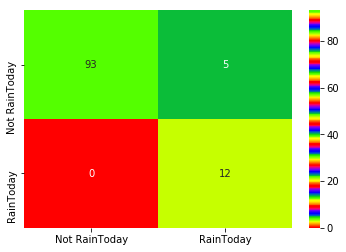

In [65]:
yconf = confusion_matrix(ylogpred,y2_test)
yyconf = pd.DataFrame(yconf,('Not RainToday','RainToday'),('Not RainToday','RainToday'))
sb.heatmap(yyconf,xticklabels=yyconf.columns.values,yticklabels=yyconf.columns.values,annot=True,annot_kws={'size':10},cmap='prism')

#### Random forest

In [66]:
yran = RandomForestClassifier()
yran = yran.fit(x_train,y2_train)
y2pred = yran.predict(x_test)
print('The accuracy for the random forest (for RainTomorrow) is {0}'.format(accuracy_score(y2pred,y2_test)* 100))

The accuracy for the random forest (for RainTomorrow) is 98.18181818181819


/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
print(classification_report(y2pred,y2_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        95
           1       0.88      1.00      0.94        15

   micro avg       0.98      0.98      0.98       110
   macro avg       0.94      0.99      0.96       110
weighted avg       0.98      0.98      0.98       110



In [68]:
confusion_matrix(y2pred,y2_test)

array([[93,  2],
       [ 0, 15]])

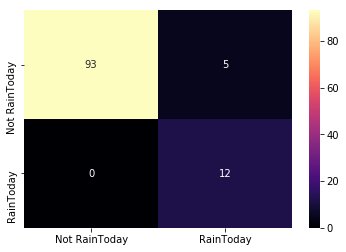

In [69]:
y2conf = confusion_matrix(y2pred,y2_test)
y22conf = pd.DataFrame(y2conf,('Not RainToday','RainToday'),('Not RainToday','RainToday'))
sb.heatmap(yyconf,xticklabels=y22conf.columns.values,yticklabels=y22conf.columns.values,annot=True,annot_kws={'size':10},cmap='magma')

#### GradientBoosting Classifier

In [79]:
yGrad = GradientBoostingClassifier()
yGrad = yGrad.fit(x_train,y2_train)
gGradpred = yGrad.predict(x_test)
print('The accuracy for the GradientBoosting (for RainTomorrow) is {0}'.format(accuracy_score(gradpred,y2_test)* 100))

The accuracy for the GradientBoosting (for RainTomorrow) is 100.0


In [80]:
print(classification_report(gGradpred,y2_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



In [81]:
confusion_matrix(gGradpred,y2_test)

array([[93,  0],
       [ 0, 17]])

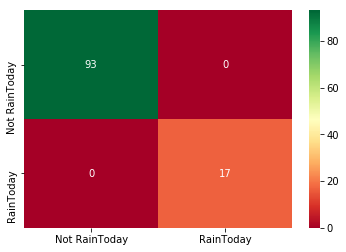

In [82]:
grconf = confusion_matrix(gradpred,y2_test)
grdconf = pd.DataFrame(grconf,('Not RainToday','RainToday'),('Not RainToday','RainToday'))
sb.heatmap(grdconf,xticklabels=grdconf.columns.values,yticklabels=grdconf.columns.values,annot=True,annot_kws={'size':10},cmap='RdYlGn')

### MODEL PERFORMANCE FOR y1...ie RainToday 

In [93]:
print('The accuracy for the Logistic Regression (for RainToday) is {0}'.format(accuracy_score(logpred,y_test)* 100))
print('The accuracy for the GradientBoosting (for RainToday) is {0}'.format(accuracy_score(ranpred,y_test)* 100))
print('The accuracy for the GradientBoosting (for RainToday) is {0}'.format(accuracy_score(grapred,y_test)* 100))

The accuracy for the Logistic Regression (for RainToday) is 89.0909090909091
The accuracy for the GradientBoosting (for RainToday) is 95.45454545454545
The accuracy for the GradientBoosting (for RainToday) is 100.0


### MODEL PERFORMANCE FOR y2...ie RainTomorrow

In [84]:
print('The accuracy for the Logistic Regression (for RainTomorrow) is {0}'.format(accuracy_score(ylogpred,y2_test)* 100))
print('The accuracy for the Random Forest(for RainTomorrow) is {0}'.format(accuracy_score(y2pred,y2_test)* 100))
print('The accuracy for the GradientBoosting (for RainTomorrow) is {0}'.format(accuracy_score(gGradpred,y2_test)* 100))

The accuracy for the Logistic Regression (for RainTomorrow) is 95.45454545454545
The accuracy for the Random Forest(for RainTomorrow) is 98.18181818181819
The accuracy for the GradientBoosting (for RainTomorrow) is 100.0
